In [63]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA,
     QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [64]:
Smarket =pd.read_csv('../datasets/Smarket.csv')
Smarket.set_index("Unnamed: 0", inplace=True)
Smarket


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Unnamed: 0,,,,,,,,,
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1246,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1247,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1248,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up


In [65]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [66]:
Smarket.select_dtypes(include=[np.number]).corr().to_numpy()

array([[ 1.        ,  0.02969965,  0.03059642,  0.03319458,  0.03568872,
         0.02978799,  0.53900647,  0.03009523],
       [ 0.02969965,  1.        , -0.02629433, -0.0108034 , -0.00298591,
        -0.00567461,  0.04090991, -0.02615505],
       [ 0.03059642, -0.02629433,  1.        , -0.02589667, -0.01085353,
        -0.00355795, -0.04338321, -0.01025003],
       [ 0.03319458, -0.0108034 , -0.02589667,  1.        , -0.02405104,
        -0.01880834, -0.04182369, -0.00244765],
       [ 0.03568872, -0.00298591, -0.01085353, -0.02405104,  1.        ,
        -0.02708364, -0.04841425, -0.00689953],
       [ 0.02978799, -0.00567461, -0.00355795, -0.01880834, -0.02708364,
         1.        , -0.02200231, -0.03486008],
       [ 0.53900647,  0.04090991, -0.04338321, -0.04182369, -0.04841425,
        -0.02200231,  1.        ,  0.01459182],
       [ 0.03009523, -0.02615505, -0.01025003, -0.00244765, -0.00689953,
        -0.03486008,  0.01459182,  1.        ]])

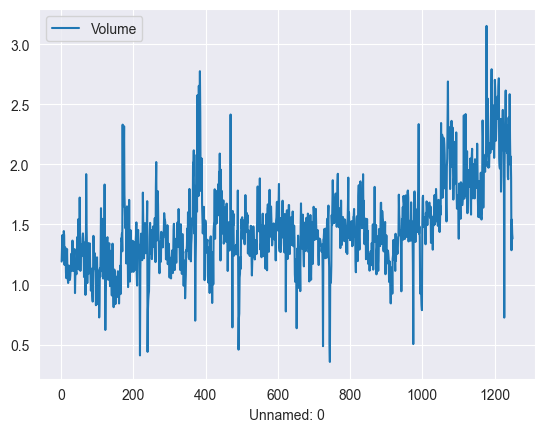

In [67]:
Smarket.plot(y='Volume');

In [68]:
allvars = Smarket.columns.drop(['Today','Direction','Year'])

X = Smarket[allvars]  # Get predictor data
y = np.where(Smarket.Direction == 'Up', 1, 0)  # Convert response

# Standardize the predictors to have mean=0 and variance=1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Fit the logistic regression model
glm_binom = sm.GLM(y, X_std, family=sm.families.Binomial())
res = glm_binom.fit()

# Print the summary statistics
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1244
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -864.64
Date:                Wed, 07 Feb 2024   Deviance:                       1729.3
Time:                        16:39:04   Pearson chi2:                 1.25e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.001512
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0829      0.057     -1.455      0.1

In [69]:
res.params

array([-0.08286343, -0.04795568,  0.01265731,  0.01065394,  0.01184819,
        0.04865308])

In [70]:
res.pvalues

array([0.14562514, 0.39898618, 0.8237013 , 0.85137899, 0.83464992,
       0.39303549])

In [71]:
probs = res.predict()
probs[:10]

array([0.48865042, 0.46310658, 0.46278103, 0.4967882 , 0.49235809,
       0.48852084, 0.47426446, 0.49078573, 0.49919008, 0.4704632 ])

In [72]:
from sklearn.metrics import confusion_matrix

# Decide on a threshold
threshold = 0.5

# Predict class labels based on the threshold
predicted_labels = [1 if p > threshold else 0 for p in probs]

# Print confusion matrix
cm_df = pd.DataFrame(cm.T,
                     index=["Predicted Down", "Predicted Up"],
                     columns=["Actual Down", "Actual Up"])
print(cm_df)

                Actual Down  Actual Up
Predicted Down          307        251
Predicted Up            295        397


In [76]:
(307+397)/1250, np.mean(labels == Smarket.Direction)

(0.5632, 0.5632)

In [74]:
print("Training error rate: %", (1- .5632)*100)

Training error rate: % 43.68


In [82]:
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[~train]
Smarket_test.shape
 

(252, 9)

In [92]:
train = train.reset_index(drop=True)
X_std = pd.DataFrame(X_std)
y = pd.Series(y)
X_train, X_test = X_std.loc[train], X_std.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]

glm_binom = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_binom.fit()

# Print the summary statistics
probs = results.predict(exog = X_test)

In [102]:
train_new_index = train.reindex(D.index)
D_train, D_test = D[train_new_index], D[~train_new_index]

In [107]:
pd.crosstab(labels, L_test.values, rownames=['Predicted'], colnames=['Truth'])

Truth,Down,Up
Predicted,,
Down,90,119
Up,21,22


In [117]:
print("test accuracy:",(90+22)/(90+119+22+21))
print("test error:", 1-(90 + 22) / (90 + 119 + 22 + 21))

test accuracy: 0.4444444444444444
test error: 0.5555555555555556


In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# Extracting our predictors and response
X = Smarket[['Lag1', 'Lag2']]
y = np.where(Smarket["Direction"] == "Up", 1, 0)
train.index = Smarket.index
# Split the data into training and testing sets using your definition of train
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y[train], y[~train]

# Add the constant term to our train dataset - this is a requirement for the statsmodels API
X_train = sm.add_constant(X_train)

# Fit the logistic regression model
model = sm.GLM(y_train, X_train, family = sm.families.Binomial())
results = model.fit()

# Print the summary of the model
print(results.summary())

# Compute the predicted probabilities on the test set
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

# Convert probabilities into binary outcomes
y_pred_labels = np.where(y_pred >0.5, 1, 0)

# Compute the confusion matrix
confusion_matrix(y_test, y_pred_labels)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  998
Model:                            GLM   Df Residuals:                      995
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -690.70
Date:                Wed, 07 Feb 2024   Deviance:                       1381.4
Time:                        17:28:11   Pearson chi2:                     998.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.001865
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0322      0.063      0.508      0.6

array([[ 35,  76],
       [ 35, 106]], dtype=int64)

In [128]:
(35+106)/252,106/(106+76)

(0.5595238095238095, 0.5824175824175825)